<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/DL_prep/DL_Training_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training Techniques

* 신경망 학습의 목적은 손실 함수의 값(L)을 가능한 0에 가깞게 낮추는 최적의 매개변수를 찾는 것.
* Optimization.

### 6-1. Update parameter

**SGD, Stochastic gradient descent**

* 매개변수 기울기(미분)의 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복하여 최적의 값에 다가가는 방법이 확률적 경사 하강법 SGD.
* 비등방성 Anisotropy 함수에서는 탐색 경로가 비효율적.
* 확률적 경사 하강법이 지그재그로 매개변수를 탐색하는 근본 원인은 기울어진 방향이 본래의 최소값과 다른 방향을 가리키기 때문.

In [ ]:
class SGD:

    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]

**Momentum**

* v, velocity 변수는 속도를 의미.
* W(t+1) = W(t) - v(t+1)

In [ ]:
class Momentum:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

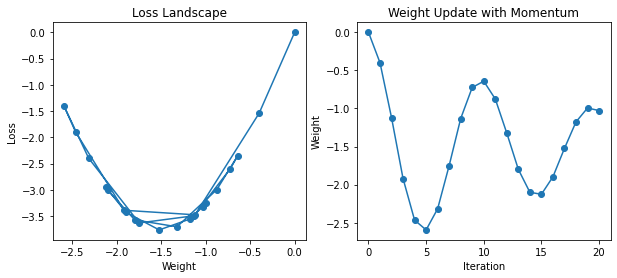

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 가중치 및 하이퍼파라미터 설정
initial_weight = 0.0
learning_rate = 0.1
momentum = 0.9
num_iterations = 20

# 손실 함수 정의 (이 예제에서는 간단한 이차함수 사용)
def loss_function(w):
    return 0.1 * w**2 + 4 * np.sin(w)

# 초기 가중치와 모멘텀 값을 설정
weight = initial_weight
momentum_velocity = 0.0

# 가중치와 손실 기록을 저장할 리스트 생성
weights = [weight]
losses = [loss_function(weight)]

# 모멘텀을 사용한 가중치 업데이트 수행
for _ in range(num_iterations):
    gradient = 0.2 * weight + 4 * np.cos(weight)  # 이차함수의 도함수
    momentum_velocity = momentum * momentum_velocity - learning_rate * gradient
    weight += momentum_velocity
    weights.append(weight)
    losses.append(loss_function(weight))

# 시각화
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(weights, losses, marker='o')
plt.title("Loss Landscape")
plt.xlabel("Weight")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(weights, marker='o')
plt.title("Weight Update with Momentum")
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.show()

**AdaGrad, Adaptive Gradient Algorithm**

* 학습률을 서서히 낮추는 방법으로 매개변수 전체의 학습률 값을 일괄적으로 낮출 수 있으며, 이를 발전시킨 것이 AdaGrad.
* 각각의 매개변수에 맞춤형 값을 만듦.
* `1e-7`를 더함으로써 self.h[key]가 0일 경우에 대비함.

In [ ]:
class AdaGrad:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

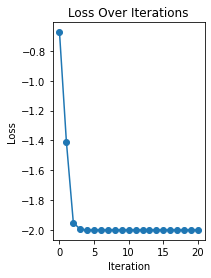

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AdaGrad:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.cumulative_squared_gradients = None

    def update(self, gradient):
        if self.cumulative_squared_gradients is None:
            self.cumulative_squared_gradients = np.zeros_like(gradient)
        self.cumulative_squared_gradients += gradient ** 2
        adjusted_learning_rate = self.learning_rate / (np.sqrt(self.cumulative_squared_gradients) + 1e-7)
        return -adjusted_learning_rate * gradient

# 초기 가중치 및 하이퍼파라미터 설정
initial_weight = [5.0, 5.0]
num_iterations = 20

# 비선형 손실 함수 정의
def nonlinear_loss_function(w):
    return np.sin(w[0]) + np.cos(w[1])

# 초기 가중치 값을 설정
weight = np.array(initial_weight)

# AdaGrad 객체 생성
ada_grad = AdaGrad(learning_rate=1.0)

# 가중치 및 손실 기록을 저장할 리스트 생성
weights = [weight]
losses = [nonlinear_loss_function(weight)]

# AdaGrad를 사용한 가중치 업데이트 수행
for _ in range(num_iterations):
    gradient = np.array([np.cos(weight[0]), -np.sin(weight[1])])  # 비선형 손실 함수의 도함수
    weight += ada_grad.update(gradient)
    weights.append(weight)
    losses.append(nonlinear_loss_function(weight))

weights = np.array(weights)

plt.subplot(1, 2, 2)
plt.plot(losses, marker='o')
plt.title("Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

**Adam, Adam algorithm**

* Momentum과 AdaGrad 기법의 융합.
* 하이퍼파라미터의 편향 보정이 진행.

```
tf.keras.optimizers.Adam(
    learning_rate=0.001, 학습률. 모델 파라미터 업데이트에 사용되는 스케일링 인자
    beta_1=0.9, 일차 모멘텀 항에 대한 지수 가중 이동 평균 파라미터. 일반적으로 0.9로 설정
    beta_2=0.999, 이차 모멘텀 항에 대한 지수 가중 이동 평균 파라미터. 일반적으로 0.999로 설정
    epsilon=1e-07, 분모를 0으로 나누는 것을 방지하기 위한 작은 값. 일반적으로 1e-7로 설정
    amsgrad=False, AMSGrad 알고리즘을 활성화할지 여부를 나타내는 불리언 값
    weight_decay=None, 가중치 감쇠(또는 L2 정규화)를 적용할 경우 사용되는 가중치 감쇠 계수
    clipnorm=None, 그레이디언트 노름(크기)을 제한하는 데 사용되는 값. 그레이디언트 폭발을 방지
    clipvalue=None, 그레이디언트의 개별 요소 값을 제한하는 데 사용되는 값. 역시 그레이디언트 폭발을 방지
    global_clipnorm=None, 전역 그레이디언트 노름 제한. clipnorm 대신 사용할 수 있으며, 전체 그레이디언트 벡터의 크기를 제한
    use_ema=False, 지수 이동 평균 (EMA)을 사용하여 가중치 업데이트를 평활화할지 여부를 나타내는 불리언
    ema_momentum=0.99, EMA에 사용되는 모멘텀 값
    ema_overwrite_frequency=None, EMA 값을 얼마나 자주 덮어쓸 것인지를 지정하는 값
    jit_compile=True, just-in-time (JIT) 컴파일을 사용하여 최적화하는 데 사용되는 불리언 값
    name="Adam", 옵티마이저의 이름
    **kwargs)
```

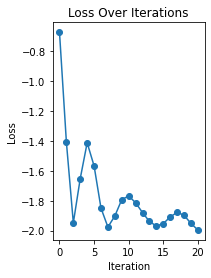

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Adam:
    def __init__(self, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.moment1 = None
        self.moment2 = None
        self.t = 0

    def update(self, gradient):
        if self.moment1 is None:
            self.moment1 = np.zeros_like(gradient)
            self.moment2 = np.zeros_like(gradient)
        self.t += 1
        self.moment1 = self.beta1 * self.moment1 + (1 - self.beta1) * gradient
        self.moment2 = self.beta2 * self.moment2 + (1 - self.beta2) * gradient**2
        moment1_hat = self.moment1 / (1 - self.beta1**self.t)
        moment2_hat = self.moment2 / (1 - self.beta2**self.t)
        adjusted_learning_rate = self.learning_rate / (np.sqrt(moment2_hat) + self.epsilon)
        return -adjusted_learning_rate * moment1_hat

# 초기 가중치 및 하이퍼파라미터 설정
initial_weight = [5.0, 5.0]
num_iterations = 20

# 비선형 손실 함수 정의
def nonlinear_loss_function(w):
    return np.sin(w[0]) + np.cos(w[1])

# 초기 가중치 값을 설정
weight = np.array(initial_weight)

# Adam 객체 생성
adam = Adam(learning_rate=1.0)

# 가중치 및 손실 기록을 저장할 리스트 생성
weights = [weight]
losses = [nonlinear_loss_function(weight)]

# Adam을 사용한 가중치 업데이트 수행
for _ in range(num_iterations):
    gradient = np.array([np.cos(weight[0]), -np.sin(weight[1])])  # 비선형 손실 함수의 도함수
    weight += adam.update(gradient)
    weights.append(weight)
    losses.append(nonlinear_loss_function(weight))

# 시각화
weights = np.array(weights)

plt.subplot(1, 2, 2)
plt.plot(losses, marker='o')
plt.title("Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

### 6-2. Weight decay

* 오버피팅을 억제하여 신경망 학습의 범용 성능을 높이는 테크닉.
* 가중치 감소는 매개변수(가중치)의 값이 작아지도록 학습하는 방법
* 가중치 초기값을 0으로 설정하면 오차역전파법에 의해 노드의 모든 가중치 값이 0으로 고르게 갱신되므로 **초기값은 무작위로 설정해야 함.**

**Activation distribution in the hidden layer**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

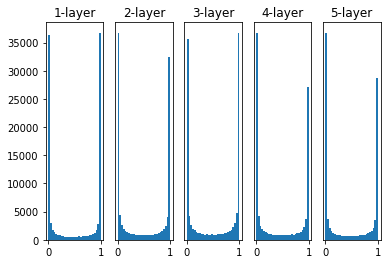

In [ ]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화값들이 0과 1 사이에 치우쳐 분포되어 있음.  
데이터가 0과 1사이에 치우쳐 분포하면 역전파의 기울기 값이 점점 작아지다가 사라짐.  
이것을 `기울기 소실 Gradient Vanishing` 이라고 함. 층을 깊게 하는 딥러닝에서 기울기 소실은 심각한 문제임.  

**가중치의 표준편차를 0.01로 수정하여 활성화값 분포를 다시 확인해 보자**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

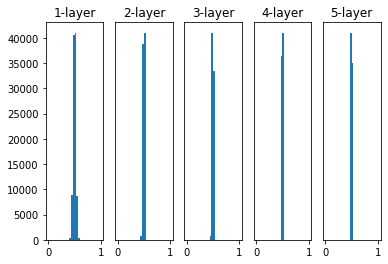

In [ ]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

가중치의 표준편차가 0.01인 정규분포로 초기화할 때 각 층의 활성화값은 0.5 근처에 집중되어 있음.  
기울기 소실이 발생하지 않았으나, **다수의 뉴런이 거의 같은 값을 출력하고 있으므로 뉴런을 여러 개 둔 의미가 없어짐.**  
활성화값들이 치우치면 표현력을 제한하는 문제가 발생함.

**각 층의 활성화값은 적당히 고루 분포되어 있어야 함.**

**Xavier**

* 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 함.
* 앞 층의 노드가 많들수록 대상 노드의 초기값으로 설정하는 가중치가 좁게 펼쳐짐.
* `sigmoid()`와 `tanh()`은 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있음.

In [ ]:
node_num = 100

w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
# w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

**가중치의 초기값으로 Xavier 초기값을 이용할 때의 각 층의 활성화값 분포**

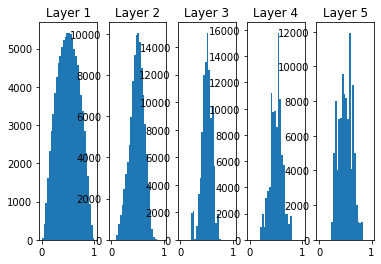

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def xavier_initialization(input_size, output_size):
    return np.random.randn(input_size, output_size) / np.sqrt(input_size)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

# Xavier 초기화를 사용한 각 층의 활성화값 생성
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = xavier_initialization(node_num, node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 활성화값 분포 시각화
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(f"Layer {i + 1}")
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

**가중치의 초기값으로 Tanh 초기값을 이용할 때의 각 층의 활성화값 분포**

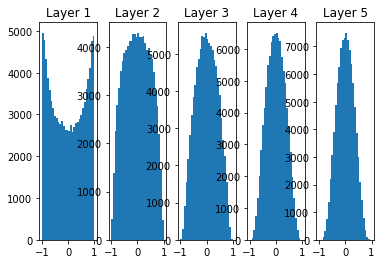

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def xavier_initialization(input_size, output_size):
    return np.random.randn(input_size, output_size) / np.sqrt(input_size)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

# Xavier 초기화를 사용한 각 층의 활성화값 생성 (tanh() 함수 사용)
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = xavier_initialization(node_num, node_num)
    a = np.dot(x, w)
    z = tanh(a)
    activations[i] = z

# 활성화값 분포 시각화
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(f"Layer {i + 1}")
    plt.hist(a.flatten(), 30, range=(-1, 1))

plt.show()

**활성화 함수로 ReLU를 사용한 경우의 가중치 초기값에 따른 활성화값 분포 변화**

ReLU 함수와 "xavier", "he", "random" 가중치 초기화 방법에 따라 활성화값 분포가 어떻게 변하는지 확인할 수 있습니다.

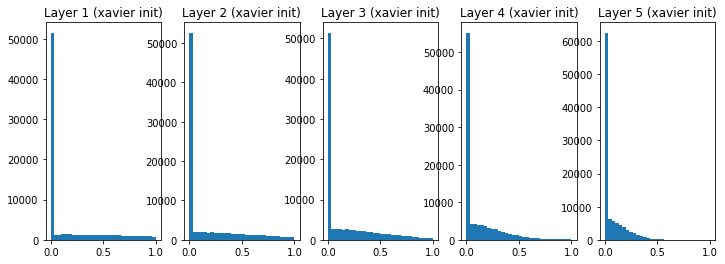

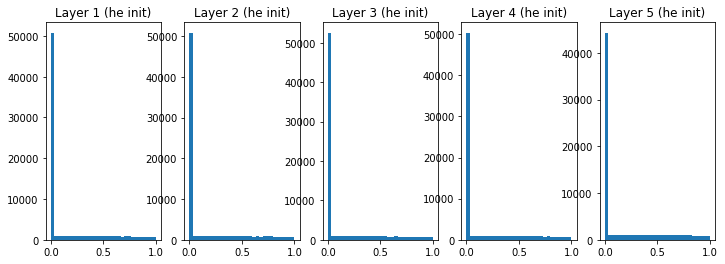

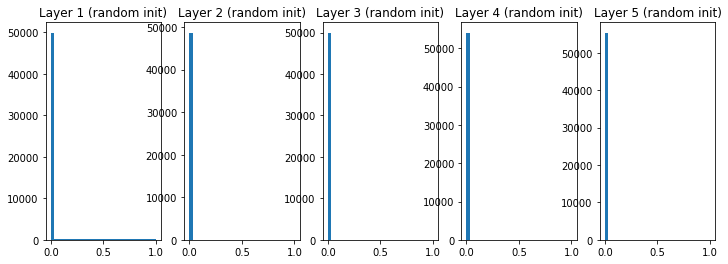

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def initialize_weights(input_size, output_size, initialization):
    if initialization == "xavier":
        return np.random.randn(input_size, output_size) / np.sqrt(input_size)
    elif initialization == "he":
        return np.random.randn(input_size, output_size) / np.sqrt(input_size / 2)
    elif initialization == "random":
        return np.random.randn(input_size, output_size)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
initializations = ["xavier", "he", "random"]
activations = {init: [] for init in initializations}

# 다양한 가중치 초기화 방법을 사용하여 각 층의 활성화값 생성 (ReLU 함수 사용)
for init in initializations:
    x_temp = x
    for i in range(hidden_layer_size):
        w = initialize_weights(node_num, node_num, init)
        a = np.dot(x_temp, w)
        z = relu(a)
        activations[init].append(z)
        x_temp = z

# 활성화값 분포 시각화
for init, act_list in activations.items():
    plt.figure(figsize=(12, 4))
    for i, a in enumerate(act_list):
        plt.subplot(1, len(act_list), i + 1)
        plt.title(f"Layer {i + 1} ({init} init)")
        plt.hist(a.flatten(), 30, range=(0, 1))
    plt.show()

**MNIST 데이터셋으로 본 가중치 초기값 비교**

===========iteration:0===========
std=0.01:2.3025387838482865
Xavier:2.3085282439514097
He:2.3935551452265633
===========iteration:100===========
std=0.01:2.3022337612893153
Xavier:2.230421523184874
He:1.9535868000073844
===========iteration:200===========
std=0.01:2.3022616555170616
Xavier:2.075805943908507
He:1.1754011362816512
===========iteration:300===========
std=0.01:2.304404242346376
Xavier:1.759069948716496
He:0.6970237207998996
===========iteration:400===========
std=0.01:2.301178554689835
Xavier:1.152483258134657
He:0.44339252167757126
===========iteration:500===========
std=0.01:2.3011301474307047
Xavier:0.8200837486178532
He:0.30824706408311153
===========iteration:600===========
std=0.01:2.3041904772511086
Xavier:0.8031938296048706
He:0.4933819624115863
===========iteration:700===========
std=0.01:2.302530749895884
Xavier:0.5768900184001367
He:0.39315335613021923
===========iteration:800===========
std=0.01:2.30302475721626
Xavier:0.5608702569994061
He:0.3775134002121665


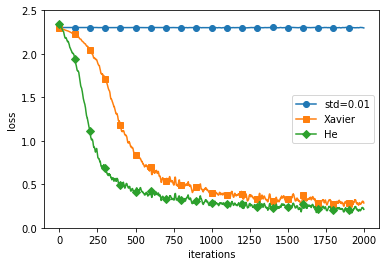

In [ ]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 실험용 설정
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 훈련
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 시각화
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 6-3. Batch Nomarlization


Data ---> `Affine -> Batch Norm -> ReLU` ---> `Affine -> Batch Norm -> ReLU` ---> ...


* 학습 속도를 개선하여 학습을 빨리 진행.
* 초기값에 크게 의존하지 않아.
* 드롭아웃 등의 필요성이 감소하므로 오버피팅을 억제.

============== 1/16 ==============
epoch:0 | 0.097 - 0.092


/aiffel/aiffel/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.11
epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.119
epoch:4 | 0.097 - 0.14
epoch:5 | 0.097 - 0.145
epoch:6 | 0.097 - 0.165
epoch:7 | 0.097 - 0.191
epoch:8 | 0.097 - 0.198
epoch:9 | 0.097 - 0.218
epoch:10 | 0.097 - 0.246
epoch:11 | 0.097 - 0.256
epoch:12 | 0.097 - 0.285
epoch:13 | 0.097 - 0.292
epoch:14 | 0.097 - 0.308
epoch:15 | 0.097 - 0.319
epoch:16 | 0.097 - 0.339
epoch:17 | 0.097 - 0.35
epoch:18 | 0.097 - 0.362


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.373
============== 2/16 ==============
epoch:0 | 0.087 - 0.071


/aiffel/aiffel/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/aiffel/aiffel/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.117 - 0.082
epoch:2 | 0.117 - 0.13
epoch:3 | 0.117 - 0.153
epoch:4 | 0.117 - 0.176
epoch:5 | 0.117 - 0.198
epoch:6 | 0.117 - 0.228
epoch:7 | 0.117 - 0.263
epoch:8 | 0.117 - 0.273
epoch:9 | 0.117 - 0.285
epoch:10 | 0.117 - 0.306
epoch:11 | 0.117 - 0.335
epoch:12 | 0.117 - 0.356
epoch:13 | 0.117 - 0.381
epoch:14 | 0.117 - 0.401
epoch:15 | 0.117 - 0.413
epoch:16 | 0.117 - 0.436
epoch:17 | 0.117 - 0.452
epoch:18 | 0.117 - 0.456


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.482
============== 3/16 ==============
epoch:0 | 0.172 - 0.065
epoch:1 | 0.298 - 0.111
epoch:2 | 0.396 - 0.149
epoch:3 | 0.535 - 0.185
epoch:4 | 0.584 - 0.221
epoch:5 | 0.65 - 0.264
epoch:6 | 0.702 - 0.312
epoch:7 | 0.746 - 0.353
epoch:8 | 0.781 - 0.388
epoch:9 | 0.809 - 0.427
epoch:10 | 0.851 - 0.461
epoch:11 | 0.858 - 0.5
epoch:12 | 0.875 - 0.526
epoch:13 | 0.899 - 0.555
epoch:14 | 0.906 - 0.572
epoch:15 | 0.914 - 0.587
epoch:16 | 0.928 - 0.62
epoch:17 | 0.938 - 0.633
epoch:18 | 0.948 - 0.659


No handles with labels found to put in legend.


epoch:19 | 0.953 - 0.674
============== 4/16 ==============
epoch:0 | 0.072 - 0.094
epoch:1 | 0.204 - 0.102
epoch:2 | 0.327 - 0.16
epoch:3 | 0.433 - 0.257
epoch:4 | 0.513 - 0.334
epoch:5 | 0.58 - 0.399
epoch:6 | 0.615 - 0.446
epoch:7 | 0.656 - 0.51
epoch:8 | 0.678 - 0.556
epoch:9 | 0.713 - 0.602
epoch:10 | 0.742 - 0.637
epoch:11 | 0.749 - 0.656
epoch:12 | 0.779 - 0.685
epoch:13 | 0.79 - 0.706
epoch:14 | 0.803 - 0.724
epoch:15 | 0.827 - 0.738
epoch:16 | 0.82 - 0.75
epoch:17 | 0.834 - 0.762
epoch:18 | 0.849 - 0.774


No handles with labels found to put in legend.


epoch:19 | 0.86 - 0.791
============== 5/16 ==============
epoch:0 | 0.094 - 0.077
epoch:1 | 0.097 - 0.118
epoch:2 | 0.101 - 0.302
epoch:3 | 0.102 - 0.414
epoch:4 | 0.103 - 0.5
epoch:5 | 0.105 - 0.585
epoch:6 | 0.105 - 0.646
epoch:7 | 0.107 - 0.699
epoch:8 | 0.107 - 0.728
epoch:9 | 0.107 - 0.761
epoch:10 | 0.108 - 0.784
epoch:11 | 0.111 - 0.795
epoch:12 | 0.115 - 0.81
epoch:13 | 0.116 - 0.824
epoch:14 | 0.118 - 0.837
epoch:15 | 0.12 - 0.845
epoch:16 | 0.127 - 0.851
epoch:17 | 0.138 - 0.86
epoch:18 | 0.141 - 0.875


No handles with labels found to put in legend.


epoch:19 | 0.152 - 0.884
============== 6/16 ==============
epoch:0 | 0.116 - 0.096
epoch:1 | 0.12 - 0.219
epoch:2 | 0.117 - 0.438
epoch:3 | 0.167 - 0.613
epoch:4 | 0.142 - 0.686
epoch:5 | 0.183 - 0.74
epoch:6 | 0.125 - 0.78
epoch:7 | 0.117 - 0.8
epoch:8 | 0.117 - 0.827
epoch:9 | 0.117 - 0.849
epoch:10 | 0.117 - 0.873
epoch:11 | 0.117 - 0.882
epoch:12 | 0.117 - 0.894
epoch:13 | 0.117 - 0.905
epoch:14 | 0.117 - 0.912
epoch:15 | 0.117 - 0.931
epoch:16 | 0.117 - 0.94
epoch:17 | 0.117 - 0.943
epoch:18 | 0.117 - 0.951


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.955
============== 7/16 ==============
epoch:0 | 0.105 - 0.124
epoch:1 | 0.117 - 0.305
epoch:2 | 0.116 - 0.673
epoch:3 | 0.116 - 0.756
epoch:4 | 0.116 - 0.781
epoch:5 | 0.116 - 0.813
epoch:6 | 0.116 - 0.833
epoch:7 | 0.116 - 0.862
epoch:8 | 0.116 - 0.884
epoch:9 | 0.116 - 0.906
epoch:10 | 0.116 - 0.926
epoch:11 | 0.119 - 0.938
epoch:12 | 0.116 - 0.953
epoch:13 | 0.116 - 0.957
epoch:14 | 0.117 - 0.966
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.979
epoch:17 | 0.117 - 0.984
epoch:18 | 0.117 - 0.987


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.99
============== 8/16 ==============
epoch:0 | 0.1 - 0.114
epoch:1 | 0.105 - 0.352
epoch:2 | 0.105 - 0.673
epoch:3 | 0.105 - 0.802
epoch:4 | 0.105 - 0.83
epoch:5 | 0.105 - 0.887
epoch:6 | 0.105 - 0.922
epoch:7 | 0.105 - 0.945
epoch:8 | 0.117 - 0.963
epoch:9 | 0.116 - 0.969
epoch:10 | 0.116 - 0.98
epoch:11 | 0.117 - 0.988
epoch:12 | 0.116 - 0.992
epoch:13 | 0.116 - 0.992
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.993
epoch:17 | 0.117 - 0.995
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 9/16 ==============
epoch:0 | 0.092 - 0.116
epoch:1 | 0.117 - 0.493
epoch:2 | 0.117 - 0.691
epoch:3 | 0.117 - 0.76
epoch:4 | 0.117 - 0.826
epoch:5 | 0.117 - 0.866
epoch:6 | 0.117 - 0.89
epoch:7 | 0.117 - 0.925
epoch:8 | 0.117 - 0.974
epoch:9 | 0.117 - 0.984
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.087 - 0.087
epoch:1 | 0.116 - 0.545
epoch:2 | 0.116 - 0.722
epoch:3 | 0.116 - 0.786
epoch:4 | 0.116 - 0.845
epoch:5 | 0.116 - 0.945
epoch:6 | 0.116 - 0.975
epoch:7 | 0.116 - 0.941
epoch:8 | 0.117 - 0.929
epoch:9 | 0.117 - 0.974
epoch:10 | 0.117 - 0.991
epoch:11 | 0.116 - 0.985
epoch:12 | 0.117 - 0.994
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.965
============== 11/16 ==============
epoch:0 | 0.087 - 0.239
epoch:1 | 0.117 - 0.612
epoch:2 | 0.117 - 0.746
epoch:3 | 0.117 - 0.583
epoch:4 | 0.117 - 0.825
epoch:5 | 0.117 - 0.805
epoch:6 | 0.116 - 0.86
epoch:7 | 0.116 - 0.876
epoch:8 | 0.116 - 0.885
epoch:9 | 0.116 - 0.876
epoch:10 | 0.116 - 0.916
epoch:11 | 0.116 - 0.974
epoch:12 | 0.116 - 0.974
epoch:13 | 0.116 - 0.982
epoch:14 | 0.116 - 0.985
epoch:15 | 0.116 - 0.988
epoch:16 | 0.117 - 0.991
epoch:17 | 0.117 - 0.992
epoch:18 | 0.117 - 0.994
epoch:19 | 0.117 - 0.993


No handles with labels found to put in legend.


============== 12/16 ==============
epoch:0 | 0.117 - 0.287
epoch:1 | 0.117 - 0.393
epoch:2 | 0.116 - 0.496
epoch:3 | 0.116 - 0.51
epoch:4 | 0.116 - 0.518
epoch:5 | 0.116 - 0.594
epoch:6 | 0.116 - 0.584
epoch:7 | 0.116 - 0.623
epoch:8 | 0.116 - 0.621
epoch:9 | 0.116 - 0.649
epoch:10 | 0.116 - 0.684
epoch:11 | 0.116 - 0.648
epoch:12 | 0.116 - 0.624
epoch:13 | 0.116 - 0.743
epoch:14 | 0.116 - 0.797
epoch:15 | 0.116 - 0.775
epoch:16 | 0.116 - 0.878
epoch:17 | 0.116 - 0.882
epoch:18 | 0.116 - 0.862


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.861
============== 13/16 ==============
epoch:0 | 0.117 - 0.13
epoch:1 | 0.117 - 0.381
epoch:2 | 0.117 - 0.559
epoch:3 | 0.117 - 0.566
epoch:4 | 0.117 - 0.596
epoch:5 | 0.117 - 0.604
epoch:6 | 0.116 - 0.612
epoch:7 | 0.116 - 0.609
epoch:8 | 0.117 - 0.62
epoch:9 | 0.116 - 0.674
epoch:10 | 0.116 - 0.678
epoch:11 | 0.117 - 0.696
epoch:12 | 0.116 - 0.706
epoch:13 | 0.117 - 0.611
epoch:14 | 0.117 - 0.689
epoch:15 | 0.117 - 0.679
epoch:16 | 0.117 - 0.702
epoch:17 | 0.117 - 0.709
epoch:18 | 0.117 - 0.705


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.714
============== 14/16 ==============
epoch:0 | 0.087 - 0.11
epoch:1 | 0.117 - 0.269
epoch:2 | 0.117 - 0.39
epoch:3 | 0.117 - 0.453
epoch:4 | 0.117 - 0.511
epoch:5 | 0.117 - 0.568
epoch:6 | 0.116 - 0.579
epoch:7 | 0.116 - 0.536
epoch:8 | 0.116 - 0.588
epoch:9 | 0.116 - 0.591
epoch:10 | 0.117 - 0.587
epoch:11 | 0.117 - 0.594
epoch:12 | 0.117 - 0.592
epoch:13 | 0.116 - 0.595
epoch:14 | 0.116 - 0.602
epoch:15 | 0.117 - 0.592
epoch:16 | 0.117 - 0.589
epoch:17 | 0.117 - 0.687
epoch:18 | 0.117 - 0.619


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.687
============== 15/16 ==============
epoch:0 | 0.117 - 0.1
epoch:1 | 0.116 - 0.311
epoch:2 | 0.116 - 0.334
epoch:3 | 0.116 - 0.377
epoch:4 | 0.116 - 0.412
epoch:5 | 0.116 - 0.397
epoch:6 | 0.116 - 0.423
epoch:7 | 0.116 - 0.409
epoch:8 | 0.116 - 0.388
epoch:9 | 0.116 - 0.391
epoch:10 | 0.116 - 0.418
epoch:11 | 0.116 - 0.424
epoch:12 | 0.116 - 0.419
epoch:13 | 0.117 - 0.429
epoch:14 | 0.117 - 0.428
epoch:15 | 0.117 - 0.426
epoch:16 | 0.117 - 0.431
epoch:17 | 0.117 - 0.43
epoch:18 | 0.116 - 0.43


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.435
============== 16/16 ==============
epoch:0 | 0.093 - 0.093
epoch:1 | 0.116 - 0.278
epoch:2 | 0.117 - 0.404
epoch:3 | 0.117 - 0.402
epoch:4 | 0.117 - 0.402
epoch:5 | 0.117 - 0.496
epoch:6 | 0.117 - 0.501
epoch:7 | 0.117 - 0.492
epoch:8 | 0.117 - 0.51
epoch:9 | 0.117 - 0.518
epoch:10 | 0.117 - 0.504
epoch:11 | 0.117 - 0.518
epoch:12 | 0.117 - 0.491
epoch:13 | 0.117 - 0.519
epoch:14 | 0.117 - 0.522
epoch:15 | 0.117 - 0.527
epoch:16 | 0.117 - 0.522
epoch:17 | 0.117 - 0.526
epoch:18 | 0.117 - 0.525
epoch:19 | 0.117 - 0.524


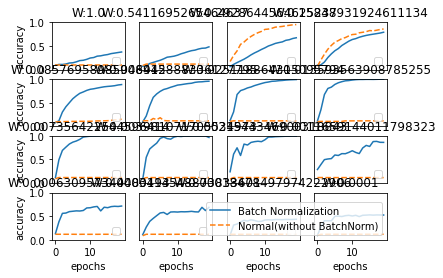

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
                                  optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 시각화
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

### 6-4. Effective Deep Learning Training Strategies

**Overfiting**

**Weight Decay**

epoch:0, train acc:0.10333333333333333, test acc:0.1069
epoch:1, train acc:0.11333333333333333, test acc:0.1144
epoch:2, train acc:0.13, test acc:0.125
epoch:3, train acc:0.14666666666666667, test acc:0.1298
epoch:4, train acc:0.15666666666666668, test acc:0.1415
epoch:5, train acc:0.17333333333333334, test acc:0.1507
epoch:6, train acc:0.18666666666666668, test acc:0.159
epoch:7, train acc:0.18666666666666668, test acc:0.1651
epoch:8, train acc:0.19, test acc:0.1712
epoch:9, train acc:0.20666666666666667, test acc:0.1805
epoch:10, train acc:0.21666666666666667, test acc:0.1878
epoch:11, train acc:0.22666666666666666, test acc:0.1946
epoch:12, train acc:0.24, test acc:0.2034
epoch:13, train acc:0.24333333333333335, test acc:0.207
epoch:14, train acc:0.26666666666666666, test acc:0.2181
epoch:15, train acc:0.2866666666666667, test acc:0.2273
epoch:16, train acc:0.31, test acc:0.2355
epoch:17, train acc:0.3333333333333333, test acc:0.2484
epoch:18, train acc:0.3566666666666667, test acc:

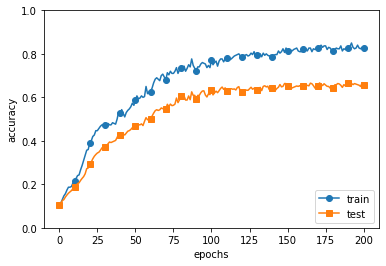

In [ ]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784,
                        hidden_size_list=[100, 100, 100, 100, 100, 100],
                        output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 시각화
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

**Dropout**

* 은닉층의 뉴런을 임의로/무작위로 삭제하면서 학습하는 방법.
* 학습할 때에는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 검증할 때는 모든 뉴런에 신호를 전달.
* 단, 검증할 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력.

In [ ]:
class Dropout:

    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand( * x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

train loss:2.3227113529738364
=== epoch:1, train acc:0.07333333333333333, test acc:0.1026 ===
train loss:2.3276286099493024
train loss:2.2995269168830093
train loss:2.319895385724651
=== epoch:2, train acc:0.07, test acc:0.1027 ===
train loss:2.3094819294308464
train loss:2.31126905182349
train loss:2.298630209598548
=== epoch:3, train acc:0.07, test acc:0.1032 ===
train loss:2.3039158640906465
train loss:2.299743008942487
train loss:2.2970668367372538
=== epoch:4, train acc:0.07, test acc:0.1063 ===
train loss:2.3130547894660474
train loss:2.314184558012731
train loss:2.297591849027959
=== epoch:5, train acc:0.07, test acc:0.1096 ===
train loss:2.2968903433180206
train loss:2.303797581131871
train loss:2.3050380665761216
=== epoch:6, train acc:0.07333333333333333, test acc:0.1115 ===
train loss:2.306505544598997
train loss:2.2843822835036214
train loss:2.309632555843992
=== epoch:7, train acc:0.07333333333333333, test acc:0.1126 ===
train loss:2.2904743526122853
train loss:2.300823336

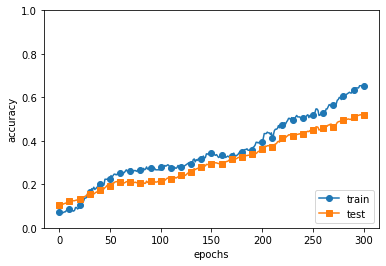

In [ ]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 시각화
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6-5. Hyperparameter

**검증 데이터**

* Hyperparameter의 적절성을 평가하는 데이터로서, 조정용 데이터.
* **훈련 데이터**는 매개변수(가중치와 편향)의 학습에 이용.
* **검증 데이터**는 하이퍼파라미터의 성능을 평가하는 데 이용.
* **시험 데이터**는 신경망 학습 모델의 범용 성능을 확인하기 위해 이용.

**하이퍼파라미터 최적화**

* 하이퍼파라미터의 최적값이 존재하는 범위를 조금씩 줄이기.
* 대략적인 범위를 설정, 그 범위에서 **무작위로** 하이퍼파라미터 값을 골라 샘플링, 그 값으로 정확도를 평가.
* 하이퍼파라미터의 범위는 대략적으로 지정. 실제로, 0.001에서 1,000 사이와 같이 **10의 거듭제곱 단위로 범위 지정.**

val acc:0.32 | lr:0.0011125169589421438, weight decay:4.474152103655461e-06
val acc:0.11 | lr:4.686282778941447e-05, weight decay:1.7523691696312985e-06
val acc:0.14 | lr:7.432987056340305e-06, weight decay:2.5801232428545138e-08
val acc:0.61 | lr:0.0041766239296883384, weight decay:2.4199680116825983e-05
val acc:0.04 | lr:0.00015082700717967393, weight decay:6.4304602524270875e-06
val acc:0.14 | lr:0.00023131229243634915, weight decay:5.321041193094384e-05
val acc:0.08 | lr:2.349220909160421e-06, weight decay:1.8541453951069684e-06
val acc:0.17 | lr:0.0010942955236290127, weight decay:2.4952377039303585e-06
val acc:0.78 | lr:0.0060892187922879, weight decay:9.989683789295027e-08
val acc:0.1 | lr:0.0001866003119081401, weight decay:9.482238594885909e-08
val acc:0.15 | lr:0.0006100368073867933, weight decay:3.7613736463962878e-06
val acc:0.11 | lr:2.8426209470285767e-05, weight decay:3.262490853611331e-07
val acc:0.5 | lr:0.0013727569922365535, weight decay:9.679476852224763e-07
val acc

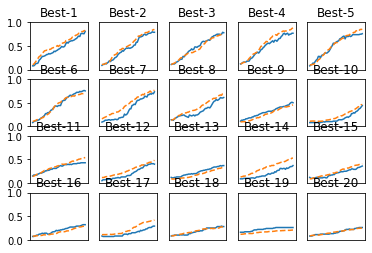

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10,
                            weight_decay_lambda=weight_decay)
    trainer = Trainer(network,
                      x_train,
                      t_train,
                      x_val,
                      t_val,
                      epochs=epocs,
                      mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr},
                      verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 시각화
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

### Conclusion

In [ ]:
from common2.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # Affine 레이어를 생성하고 가중치와 편향을 설정합니다.
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모읍니다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.12
| 에폭 4 |  반복 10 / 10 | 손실 1.12
| 에폭 5 |  반복 10 / 10 | 손실 1.11
| 에폭 6 |  반복 10 / 10 | 손실 1.14
| 에폭 7 |  반복 10 / 10 | 손실 1.16
| 에폭 8 |  반복 10 / 10 | 손실 1.11
| 에폭 9 |  반복 10 / 10 | 손실 1.12
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.12
| 에폭 12 |  반복 10 / 10 | 손실 1.11
| 에폭 13 |  반복 10 / 10 | 손실 1.09
| 에폭 14 |  반복 10 / 10 | 손실 1.08
| 에폭 15 |  반복 10 / 10 | 손실 1.04
| 에폭 16 |  반복 10 / 10 | 손실 1.03
| 에폭 17 |  반복 10 / 10 | 손실 0.96
| 에폭 18 |  반복 10 / 10 | 손실 0.92
| 에폭 19 |  반복 10 / 10 | 손실 0.92
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.85
| 에폭 22 |  반복 10 / 10 | 손실 0.82
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.78
| 에폭 25 |  반복 10 / 10 | 손실 0.82
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.76
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.78
| 에폭 30 |  반복 10 / 10 | 손실 0.75
| 에폭 31 |  반복 10 / 10 | 손실 0.78
| 에폭 32 |  반복 10 

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

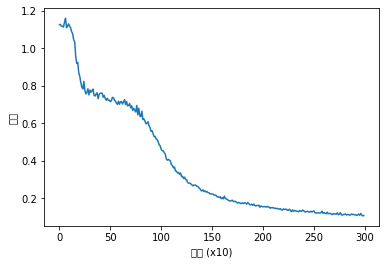

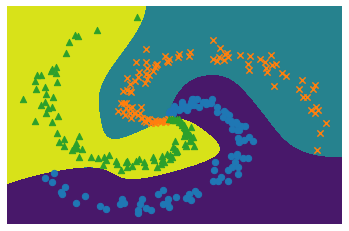

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common2.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 3. 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 4. 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 5. 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |  반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

1. **우선 하이퍼파라미터를 설정.**  
    구체적으로는 학습하는 에폭의 수 / 미니배치 크기 / 은닉충의 뉴런수 / 학습률을 설정.  
    
    
2. **데이터를 잃고, 신경망 모델과 옵티마이저 생성.**
    `epoch는 학습 단위`, 1 epoch은 학습 데이터를 모두 살펴본 시점.
    
    
3. 학습은 미니배치 방식으로 진행되며, **데이터를 무작위로 선택.**  
    에폭 단위로 데이터를 뒤섞고, 뒤섞은 데이터 중 앞에서부터 순서대로 뽑아내는 방식을 사용.  
    데이터 뒤섞기(데이터의 인덱스 섞기)는 `np.random.permutation()` 메서드를 사용.  
    이 메서드에 인수로 N을 주면, 0에서 N-1까지의 무작위 순서를 생성하여 반환.

In [ ]:
import numpy as np
np.random.permutation(10)

array([3, 5, 0, 9, 7, 6, 1, 2, 4, 8])

4. **기울기를 구해 매개변수 갱신.**  


5. **정기적으로 학습 결과 출력.**  
    

**위의 코드의 첫 번째 시각화 자료는 손실그래프**

가로축은 학습의 반복 수(눈금 값의 10배), 세로축은 학습 10번 반복 당 손실 평균.  
학습을 진행함에 따라 손실이 줄어드는 것을 확인할 수 있음. 즉, 신경망이 올바른 방향으로 학습되고 있음.  

**위의 코드의 두 번째 시각화 자료**

학습 후 신경망이 영역을 어떻게 분리했는지 확인할 수 있음.  
신경망의 영역 분리를 `결정 경계 Decision Boundary` 라고 함.  
신경망은 나선형 패턴을 올바르게 파악했음을 알 수 있음. 즉, 비선형 분리 영역을 학습할 수 있음.  
신경망에 은닉층을 추가하면 더 복잡한 표현이 가능함. 층을 깊게 쌓으면 표현력 또한 풍부해지는 것이 딥러닝의 특징.  

In [ ]:
import sys
sys.path.append('..')
import numpy
import time
import matplotlib.pyplot as plt
import numpy as np
from common2.util import clip_grads


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('손실')
        plt.show()


class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0

    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size)

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()


def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

### Trainer Class

In [ ]:
import sys
sys.path.append('..')
import numpy
import time
import matplotlib.pyplot as plt
import numpy as np
from common2.util import clip_grads


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('손실')
        plt.show()


class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0

    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size)

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()


def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

In [ ]:
# model = TwoLayerNet()
# optimizer = SGD(lr=1.0)
# trainer = Trainer(model, optimizer)

### Summary

* 신경망은 입력층 / 은닉층 / 출력층을 지님.
* 완전연결계층(Affine)에 의해 선형 변환이 이뤄지고, 활성화 함수(ReLU, Sigmoid)에 의해 비선형 변환이 이뤄짐.
* 완전연결계층이나 미니배치 처리는 행렬로 모아 한 번에 계산할 수 있음.
* 오차역전파법을 사용하여 신경망의 손실에 관한 기울기를 효율적으로 구할 수 있음.
* 신경망이 수행하는 처리는 계산 그래프로 시각화할 수 있으며, 순전파와 역전파를 이해하는 데 도움이 됨.
* 신경망의 구성요소들을 계층으로 모듈화 해두면, 이를 조립하여 신경망을 쉽게 구성할 수 있음.
* 신경망 고속화에는 GPU를 이요한 병렬 계산과 데이터의 비트 정밀도가 중요.